In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, axis = 0)
    denominator = np.max(data, axis = 0) - np.min(data, axis=0)
    return numerator / (denominator + 1e-7)

In [3]:
xy = np.loadtxt('../data/data-02-stock_daily.csv', delimiter=',')

xy = xy[::-1]  # 역순
xy 

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [4]:
# train parameters
seq_length = 7
input_feature = 5

train_size = int(len(xy) * 0.7)
train_set = xy[0 : train_size]
test_set = xy[len(train_set) - seq_length : ]

In [5]:
print(train_set.shape, test_set.shape)

(512, 5) (227, 5)


In [6]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [7]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i: i+seq_length, :]
        y =  time_series[i+seq_length, [-1]]
        print(x, '->', y)
        dataX.append(x)
        dataY.append(y)
        
    return np.array(dataX), np.array(dataY)

In [8]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)
print(trainX.shape, trainY.shape)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]] -> [0.23822662]
[[0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]
 [0.13188913 0.17398158 0.16051467 0.19706014 0.19010097]
 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]
 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]] -> [0.30733474]
[[0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]
 [0.13188913 0.17398158 0.16051467 0.19706014 0.19010097]
 [0.17977635 0.2377432  0.21174296 0.29006005 0.24132471]
 [0.225904   0.23996848 0.24782814 0.15924532 0.23822662]
 [0.2431199  0.28820734 0.27721916 0.42667384 0.30733474]] -> [0.6350262]
[[0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.1244736

(505, 7, 5) (505, 1)


In [9]:
print(trainX.shape, trainY.shape)

(505, 7, 5) (505, 1)


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, input_feature)))
model.add(tf.keras.layers.Dense(units=1, activation='tanh'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model.fit(trainX, trainY, epochs=100)

Epoch 1/100
16/16 [==============================] - 3s 6ms/step - loss: 0.0951
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0235
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 13/100
16/16 [=================

In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [13]:
test_predict = model.predict(testX)

7/7 [==============================] - 1s 4ms/step


C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Legend doe

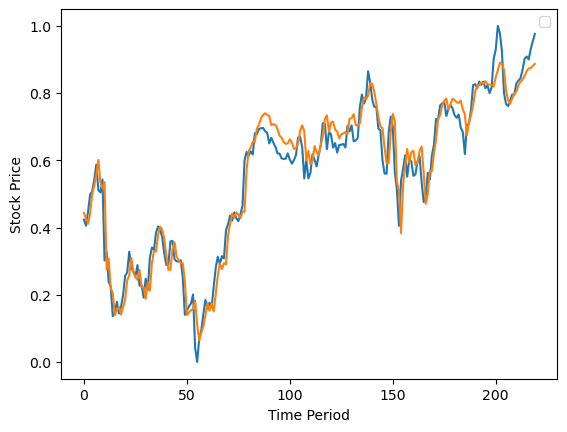

In [15]:
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.legend('target', 'predict')
plt.show()